In [15]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)


In [16]:
df=pd.read_csv("liar_dataset/train1.csv")

In [17]:
df.head()


,Json_id,Label,statement,subject_data,speaker,speaker_job_title,state_info,party_affiliation,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location)
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [18]:
df.describe()

,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000
mean,11.533210,13.286482,17.133718,16.434265,6.201407
std,18.973764,24.112936,35.846511,36.151688,16.128927
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,12.000000,13.000000,11.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


In [19]:
# Let us get some basic stats #
print("Total Number of records : ", df.shape[0])
print("Number of uniques speakers : ", len(df.speaker.unique()))
print("Number of uniques speaker_job_title : ", len(df.speaker_job_title.unique()))
print("Number of uniques party_affiliation : ", len(df.party_affiliation.unique()))
print("Number of uniques state : ", len(df.state_info.unique()))


Total Number of records :  10240
Number of uniques speakers :  2911
Number of uniques speaker_job_title :  1185
Number of uniques party_affiliation :  24
Number of uniques state :  85


In [20]:
df.isnull().sum(axis=0)

Json_id                       0
Label                         0
statement                     0
subject_data                  2
speaker                       2
speaker_job_title          2897
state_info                 2208
party_affiliation             2
Barely_true_count             2
False_count                   2
Half_true_count               2
Mostly_true_count             2
Fire_counts                   2
Context(value/location)     102
dtype: int64

# Data Cleaning


In [21]:
df.drop('Json_id', axis = 1, inplace = True)


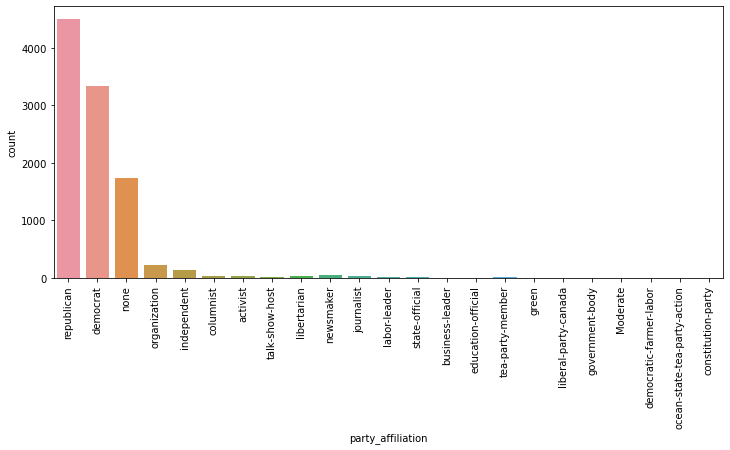

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x='party_affiliation', data=df)
plt.xticks(rotation='vertical')
plt.show()

#based on result missing is replaced by repulication
df['party_affiliation'].fillna("republican", inplace=True)



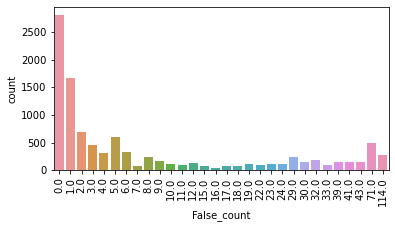

In [23]:
plt.figure(figsize=(6,3))
sns.countplot(x='False_count', data=df)
plt.xticks(rotation='vertical')
plt.show()


In [24]:
#Filling in missing values
df['speaker_job_title'].fillna("Others", inplace=True)
df['state_info'].fillna("Others", inplace=True)
df['Context(value/location)'].fillna("Others", inplace=True)
df['speaker'].fillna("none", inplace=True)
df['Barely_true_count'].fillna(0.0, inplace=True)
df['False_count'].fillna(0.0, inplace=True)
df['Half_true_count'].fillna(0.0, inplace=True)
df['Mostly_true_count'].fillna(0.0, inplace=True)
df['Fire_counts'].fillna(0.0, inplace=True)
df['subject_data'].fillna("none", inplace=True)


In [25]:
df.isnull().sum(axis=0)

Label                      0
statement                  0
subject_data               0
speaker                    0
speaker_job_title          0
state_info                 0
party_affiliation          0
Barely_true_count          0
False_count                0
Half_true_count            0
Mostly_true_count          0
Fire_counts                0
Context(value/location)    0
dtype: int64

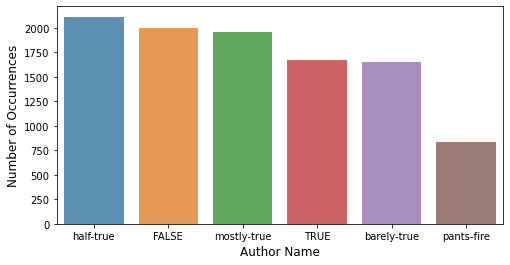

In [26]:
cnt_srs = df['Label'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

The dataset is balanced

In [27]:
def update_y(temp):
    if (temp=='FALSE' or temp=='barely-true' or temp=='pants-fire'):
        return 0
    else:
        return 1  
df['Label'] = df['Label'].apply(update_y)
y=df['Label']

In [28]:
df.head()

,Label,statement,subject_data,speaker,speaker_job_title,state_info,party_affiliation,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location)
0,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,0,Health care reform legislation is likely to ma...,health-care,blog-posting,Others,Others,none,7.0,19.0,3.0,5.0,44.0,a news release
4,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,Others,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [29]:
#Labels=df['Label']
#from sklearn.preprocessing import OrdinalEncoder
#Labels = pd.DataFrame(OrdinalEncoder().fit_transform(Labels.to_numpy().reshape(-1,1)))
 #or

from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
#y = lbl_enc.fit_transform(df.Label.values)
df["party"] = lbl_enc.fit_transform(df.party_affiliation.values)
df["state"] = lbl_enc.fit_transform(df.state_info.values)
df["speaker_l"] = lbl_enc.fit_transform(df.speaker.values)
df["speaker_job_title_1"] = lbl_enc.fit_transform(df.speaker_job_title.values)


df.drop('Label', axis = 1, inplace = True)
df.drop('party_affiliation', axis = 1, inplace = True)
df.drop('state_info', axis = 1, inplace = True)
df.drop('speaker', axis = 1, inplace = True)


In [30]:
le_name_mapping = dict(zip(lbl_enc.classes_, lbl_enc.transform(lbl_enc.classes_)))
print(le_name_mapping)

{'18-percent-american-public': 0, '60-plus-association': 1, 'AARP': 2, 'Arizona-Citizens-Defense-League': 3, 'Ballesteros': 4, 'Coast-Guard': 5, 'GaGOP': 6, 'Kiplinger-com': 7, 'Yes-on-79': 8, 'abel-collins': 9, 'accountability-government': 10, 'accountability-project': 11, 'aclu-florida': 12, 'aclu-georgia-foundation': 13, 'aclu-north-carolina': 14, 'actionaid-k': 15, 'adam-hasner': 16, 'adam-kinzinger': 17, 'adam-putnam': 18, 'adam-schefter': 19, 'addicting-information': 20, 'advancing-wisconsin': 21, 'afl-cio': 22, 'afscme': 23, 'afscme-people': 24, 'agenda-project': 25, 'akbar-al-baker': 26, 'al-cardenas': 27, 'al-gore': 28, 'al-hunt': 29, 'al-jazeera-america': 30, 'al-roker': 31, 'al-sharpton': 32, 'alan-grayson': 33, 'alan-hays': 34, 'alan-krueger': 35, 'alan-powell': 36, 'alan-simpson': 37, 'alberta-darling': 38, 'alberto-carvalho': 39, 'albio-sires': 40, 'alcee-hastings': 41, 'alex-castellanos': 42, 'alex-mcmurtrie-jr': 43, 'alex-sink': 44, 'alex-wan': 45, 'alexander-snitker': 

In [31]:
df

,statement,subject_data,speaker_job_title,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location),party,state,speaker_l
0,Says the Annies List political group supports ...,abortion,State representative,0.0,1.0,0.0,0.0,0.0,a mailer,19,63,814
1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",State delegate,0.0,0.0,1.0,1.0,0.0,a floor speech.,5,70,2492
2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,President,70.0,71.0,160.0,163.0,9.0,Denver,5,19,182
3,Health care reform legislation is likely to ma...,health-care,Others,7.0,19.0,3.0,5.0,44.0,a news release,16,50,272
4,The economic turnaround started at the end of ...,"economy,jobs",Others,15.0,9.0,20.0,19.0,2.0,an interview on CNN,5,13,428
...,...,...,...,...,...,...,...,...,...,...,...,...
10235,There are a larger number of shark attacks in ...,"animals,elections",Others,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",16,13,12
10236,Democrats have now become the party of the [At...,elections,Others,0.0,0.0,0.0,1.0,0.0,an interview,19,15,36
10237,Says an alternative to Social Security that op...,"retirement,social-security",Others,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,19,15,1108
10238,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",Others,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,5,13,1243


In [32]:
y

0        0
1        1
2        1
3        0
4        1
        ..
10235    1
10236    1
10237    1
10238    0
10239    0
Name: Label, Length: 10240, dtype: int64

In [33]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#df = df.reset_index(drop=True)

def clean_text(temp):
    temp = temp.lower() # lowercase text
    temp = re.sub('[^a-zA-Z]',' ', temp)
    temp=temp.split( )
    temp= [stemmer.stem(word) for word in temp if word not in set(stopwords.words('english'))]
    temp= ' '.join(temp)
    return temp
df['statement'] = df['statement'].apply(clean_text)
df['subject_data'] = df['subject_data'].apply(clean_text)
df['Context(value/location)'] = df['Context(value/location)'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#merging state and job_title to one

def merge(temp):
    temp = temp.lower() # lowercase text
    temp = re.sub(' ','_', temp)
    return temp
df['speaker_job_title'] = df['speaker_job_title'].apply(merge)
#df['subject_data'] = df['subject_data'].apply(merge)


In [35]:
 df.head()

,statement,subject_data,speaker_job_title,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location),party,state,speaker_l
0,say anni list polit group support third trimes...,abort,state_representative,0.0,1.0,0.0,0.0,0.0,mailer,19,63,814
1,declin coal start start natur ga took start be...,energi histori job accomplish,state_delegate,0.0,0.0,1.0,1.0,0.0,floor speech,5,70,2492
2,hillari clinton agre john mccain vote give geo...,foreign polici,president,70.0,71.0,160.0,163.0,9.0,denver,5,19,182
3,health care reform legisl like mandat free sex...,health care,others,7.0,19.0,3.0,5.0,44.0,news releas,16,50,272
4,econom turnaround start end term,economi job,others,15.0,9.0,20.0,19.0,2.0,interview cnn,5,13,428


TF-IDF vectorization

In [36]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv =TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_statement = cv.fit_transform(df["statement"]).toarray()
X_statement.shape
X_statement

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
cv.get_feature_names()[:20]

['abbott',
 'abel',
 'abil',
 'abl',
 'abolish',
 'abort',
 'abort even',
 'abort even case',
 'abort illeg',
 'abort right',
 'abraham',
 'abraham lincoln',
 'absolut',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'access health',
 'access health care']

In [38]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

# taking that array into dataframe


In [39]:
#taking that array into dataframe
X_df_statement = pd.DataFrame(X_statement, columns=cv.get_feature_names())

In [40]:
X_df_statement

,abbott,abel,abil,abl,abolish,abort,abort even,abort even case,abort illeg,abort right,abraham,abraham lincoln,absolut,abus,academ,academi,accept,access,access health,access health care,accid,accommod,accomplish,accord,accord recent,...,year tax,year term,year texa,year total,year weve,year year,yemen,yet,york,york citi,york state,york time,young,young adult,young peopl,your,your go,youth,youth unemploy,youv,youv got,zero,zero job,zika,zone
0,0.0,0.0,0.0,0.0,0.0,0.32659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10236,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10237,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10238,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#Count vectorzer for subject and contecxt

from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()
X_subject_data = cv1.fit_transform(df["subject_data"]).toarray()
X_df_subject_data = pd.DataFrame(X_subject_data, columns=cv1.get_feature_names())
X_df_subject_data.head()

cv2 = CountVectorizer()
X_Context = cv2.fit_transform(df["Context(value/location)"]).toarray()
X_df_Context = pd.DataFrame(X_Context, columns=cv2.get_feature_names())

In [42]:
X_df_subject_data.head()

,abc,abort,accomplish,administr,advertis,afghanistan,agricultur,alcohol,amend,anim,autism,bankruptci,basebal,bay,biographi,bipartisanship,birth,budget,bush,busi,campaign,candid,cap,care,censu,...,state,stimulu,street,suprem,tampa,tax,technolog,terror,tourism,trade,transpar,transport,union,updat,urban,veteran,vote,wall,water,wealth,weather,week,welfar,women,worker
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
X_df_Context.head()

,aarp,abbott,abc,aboard,academi,accept,access,accomplish,account,act,action,activist,actress,ad,addict,address,adopt,adubato,advertis,advis,advisori,affair,afford,afghanistan,aficianado,...,workshop,world,worth,would,wplg,wpri,wpro,wral,written,wsb,wsiu,wtsp,wtvf,xl,xlviii,yahoo,yard,year,ynn,york,young,youngstown,youtub,zach,zakaria
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
X_df = pd.concat([X_df_statement, X_df_subject_data, X_df_Context], axis=1, sort=False)
X_df.shape

#Adding features to new dataframe
#remove it
'''
X_df['speaker_job_title_1']=df['speaker_job_title_1']
X_df['party']=df['party']
X_df['state']=df['state']
X_df['speaker_l']=df['speaker_l']
'''

X_df['Barely_true_count']=df['Barely_true_count']
X_df['False_count']=df['False_count']
X_df['Half_true_count']=df['Half_true_count']
X_df['Mostly_true_count']=df['Mostly_true_count']
X_df['Fire_counts']=df['Fire_counts']



In [84]:
mm_scaler = preprocessing.MinMaxScaler()
X_df = mm_scaler.fit_transform(X_df)

In [85]:
X_df

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00625   , 0.00613497,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.08571429],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03125   , 0.01840491,
        0.02857143],
       [0.        , 0.        , 0.        , ..., 0.01875   , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00625   , 0.        ,
        0.01904762]])

In [86]:
X_df.isnull().sum(axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [91]:
## train test split
from sklearn.model_selection import train_test_split
steps = 25000
X_train,X_test,Y_train,Y_test = train_test_split(X_df, y, test_size=0.1,shuffle = True)

In [90]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [93]:
model = MultinomialNB(alpha=0.9)
model.fit(X_train,Y_train )
pred = model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.608


In [74]:
model.coef_[0]

array([-11.51809937, -11.29287029, -10.94364244, ...,  -1.6226239 ,
        -1.7041501 ,  -2.28580827])

In [50]:
#top list of fake words used
feature_names = cv.get_feature_names()
sorted(zip(model.coef_[0], feature_names))[:5000]

[(-12.989744644556476, 'administr spent'),
 (-12.989744644556476, 'advisori'),
 (-12.989744644556476, 'affili'),
 (-12.989744644556476, 'barack hussein'),
 (-12.989744644556476, 'barack hussein obama'),
 (-12.989744644556476, 'bennet'),
 (-12.989744644556476, 'betti'),
 (-12.989744644556476, 'betti sutton'),
 (-12.989744644556476, 'bid'),
 (-12.989744644556476, 'budget repair'),
 (-12.989744644556476, 'budget repair bill'),
 (-12.989744644556476, 'build code'),
 (-12.989744644556476, 'bulb'),
 (-12.989744644556476, 'cabinet'),
 (-12.989744644556476, 'cap trade plan'),
 (-12.989744644556476, 'capit world'),
 (-12.989744644556476, 'care reform bill'),
 (-12.989744644556476, 'cast decid'),
 (-12.989744644556476, 'cast decid vote'),
 (-12.989744644556476, 'class tax'),
 (-12.989744644556476, 'clinton say'),
 (-12.989744644556476, 'controversi'),
 (-12.989744644556476, 'cornil'),
 (-12.989744644556476, 'could cost'),
 (-12.989744644556476, 'couldnt get'),
 (-12.989744644556476, 'court nomin

In [51]:
## confusion matrix

from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,precision_recall_fscore_support
confMatrix = confusion_matrix(Y_test,Y_predict)
accuracy_noun = accuracy_score(Y_test,Y_predict)
precision_recall_fscore = precision_recall_fscore_support(Y_test,Y_predict)

print("[nouns] Accurracy {} Precision recall {} confusion matrix {} ".format(accuracy_noun,precision_recall_fscore,confMatrix))

NameError: name 'Y_predict' is not defined

In [52]:
# Print the confusion matrix
print(metrics.confusion_matrix(Y_test, pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, pred, digits=3))

[[328 158]
 [161 377]]
              precision    recall  f1-score   support

           0      0.671     0.675     0.673       486
           1      0.705     0.701     0.703       538

    accuracy                          0.688      1024
   macro avg      0.688     0.688     0.688      1024
weighted avg      0.689     0.688     0.689      1024



Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories. The kappa score measures the degree of agreement between the two evaluators (true values and the predicted values), which we use as the classifier’s performance.

Kappa score considers how much better the agreements are over and beyond chance agreements.It uses the expected proportion of chance agreements called ChanceAgree.

KappaScore=(Agree-ChanceAgree)/(1-ChanceAgree)



KAppa Cohen's:
According to Cohen's original article, values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

In [53]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
cohen_kappa_score(Y_test, pred)

0.3755285877054132